In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import t

In [2]:
df = pd.read_csv('merged_dataset_additional_features.csv')

In [19]:
#linear regression with TSCV

X = df[['normalized_score']]
y = df['Close']

# Initialize time series split
tscv = TimeSeriesSplit(n_splits=10)

mae_scores = []
mse_scores = []
r2_scores = []

# Perform rolling window cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Average MAE and R² across folds
avg_mae = np.mean(mae_scores)
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print(f'Average MAE: {avg_mae}')
print(f'Average MSE: {avg_mse}')
print(f'Average R²: {avg_r2}')

coefficients = model.coef_
print("Model Coefficients:")
print(coefficients)

#split on 5 --> R² = 0.942, MAE = 278.02
#split on 10 --> R² = 0.899, MAE = 247.53

Average MAE: 217.95583738016396
Average MSE: 137729.3077370861
Average R²: 0.05898564945085411
Model Coefficients:
[4157.65977143]


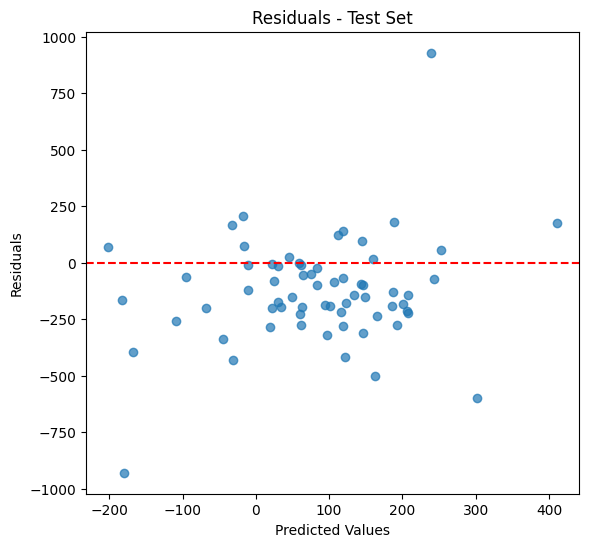

In [20]:
# Residuals for test set
test_residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_pred, test_residuals, alpha=0.7)
plt.title('Residuals - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.show()

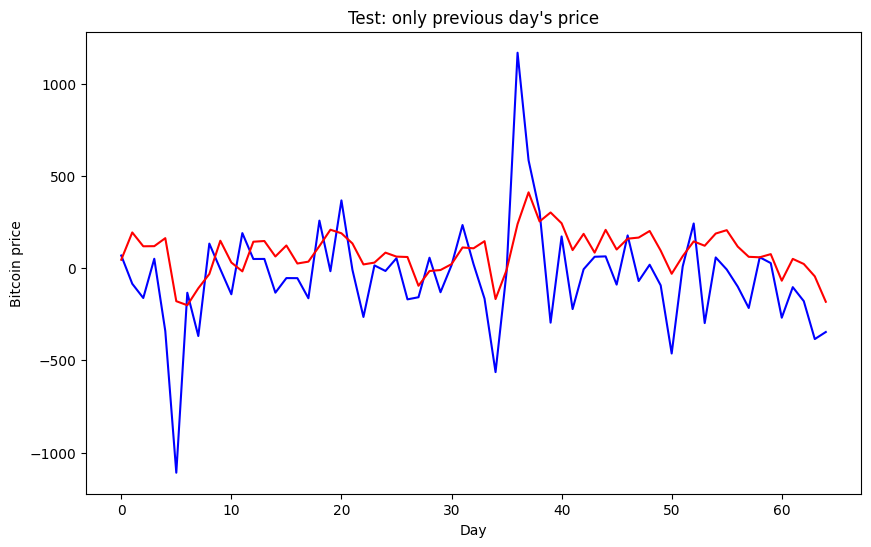

In [21]:
#plot actual vs predicted values for the test set
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, color='blue')
    plt.plot(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.xlabel('Day')
    plt.ylabel('Bitcoin price')
    plt.show()
    return

plotGraph(y_test, y_pred, "Test: only previous day's price")

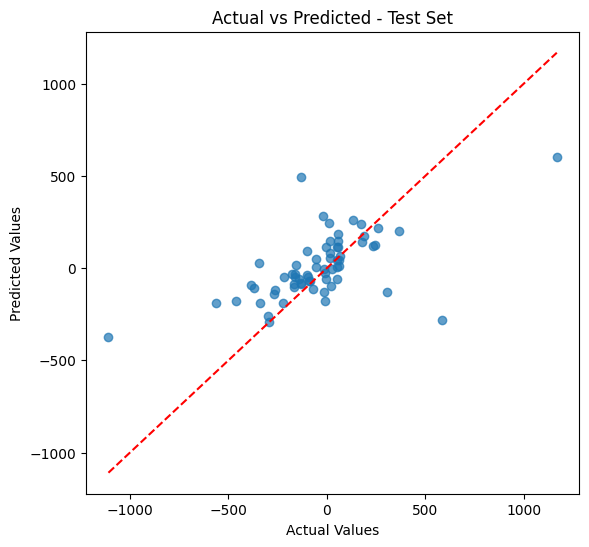

In [11]:
# Plot Actual vs Predicted for Test Set
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title('Actual vs Predicted - Test Set')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction

plt.show()

In [ ]:
#LR with TSCV get results for all features and predefined base features

features = ['simple_score', 'content2', 'normalized_score', 'VADER_sentiment', 'previous_day_simple_sentiment', 'previous_3day_simple_sentiment', 'previous_5day_simple_sentiment', 'previous_7day_simple_sentiment', 'previous_10day_simple_sentiment', 'content2_1', 'content2_3', 'content2_5', 'content2_7', 'content2_10', 'VADER_1', 'VADER_3', 'VADER_5', 'VADER_7', 'VADER_10', 'VADER_norm', 'VADER_norm1', 'VADER_norm3', 'VADER_norm5', 'VADER_norm7', 'VADER_norm10', 'previous_day_sentiment', 'previous_3day_sentiment', 'previous_5day_sentiment', 'previous_7day_sentiment', 'previous_10day_sentiment']
results = {'Feature': [], 'MAE': [], 'MSE': [], 'R^2': []}

# Iterate over each feature
for feature in features:
    # Prepare the data with the current feature and previous day's close
    X = df[[feature, 'previous_close']]
    y = df['Close']
    
    # Initialize time series split for cross-validation
    tscv = TimeSeriesSplit(n_splits=15)
    
    mae_scores = []
    r2_scores = []
    mse_scores = []
    
    # Perform LR TSCV
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mae_scores.append(mae)
        mse_scores.append(mse)
        r2_scores.append(r2)
    
    # Average MAE, MSE, and R^2 across folds
    avg_mae = np.mean(mae_scores)
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)
    
    # Store the results
    results['Feature'].append(feature)
    results['MAE'].append(avg_mae)
    results['MSE'].append(avg_mse)
    results['R^2'].append(avg_r2)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

In [ ]:
#see which features are significant

pd.options.display.float_format = '{:.6f}'.format

# Define features list
features = ['previous_volume', 'simple_score', 'content2', 'normalized_score', 'VADER_sentiment', 'previous_day_simple_sentiment', 
            'previous_3day_simple_sentiment', 'previous_5day_simple_sentiment', 'previous_7day_simple_sentiment', 
            'previous_10day_simple_sentiment', 'content2_1', 'content2_3', 'content2_5', 'content2_7', 'content2_10', 
            'VADER_1', 'VADER_3', 'VADER_5', 'VADER_7', 'VADER_10', 'VADER_norm', 'VADER_norm1', 'VADER_norm3', 
            'VADER_norm5', 'VADER_norm7', 'VADER_norm10', 'previous_day_sentiment', 'previous_3day_sentiment', 
            'previous_5day_sentiment', 'previous_7day_sentiment', 'previous_10day_sentiment']

# Initialize results dictionary
results = {'Feature': [], 'p-value (t-test)': []}

# Iterate over each feature
for feature in features:
    X = df[['previous_close', feature]]
    y = df['Close']
    
    # Add constant for statsmodels regression
    X = sm.add_constant(X)
    
    tscv = TimeSeriesSplit(n_splits=15)
    
    mae_scores = []
    mse_scores = []
    r2_scores = []
    p_values_t = []
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = sm.OLS(y_train, X_train).fit()
        
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        mae_scores.append(mae)
        mse_scores.append(mse)
        r2_scores.append(r2)
        
        # Collect p-values for the t-test (individual feature significance)
        p_values_t.append(model.pvalues[feature])

    # Calculate the average of the statistics
    avg_mae = np.mean(mae_scores)
    avg_mse = np.mean(mse_scores)
    avg_r2 = np.mean(r2_scores)
    avg_p_value_t = np.mean(p_values_t)

    results['Feature'].append(feature)
    results['p-value (t-test)'].append(avg_p_value_t)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)
